In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"

#constance
'''args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)

code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
'''

sys.path.insert(0, util_path)

In [16]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd_feasibility_BMD/2_bmd/latest/phase_III/LPR


In [17]:
# mac       - phase III - LPR - 240 timepoints
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/behavior/LPR/wide/devel/Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_devel.csv'

df_lpr = pd.read_csv(complete_file_path, header = 0)
display(df_lpr.head())
display(df_lpr.tail())

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,275,14017,A01,275_14017_A01,67.0,17.142,0.0,0.000,0.0,0.0,...,0.000,0.458,25.470999,34.078,25.297,22.984001,23.995999,23.784999,34.665,24.385999
1,275,14017,A02,275_14017_A02,67.0,2.896,0.0,0.000,0.0,0.0,...,13.179,18.311,22.172000,16.888,16.213,17.462000,18.388000,24.773999,15.010,17.925000
2,275,14017,A03,275_14017_A03,67.0,15.633,0.0,0.000,0.0,0.0,...,17.166,9.421,8.952000,15.298,15.343,22.034000,24.222000,8.103000,11.597,4.356000
3,275,14017,A04,275_14017_A04,67.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,275,14017,A05,275_14017_A05,67.0,2.999,0.0,1.861,0.0,0.0,...,9.748,15.196,10.164000,6.270,8.580,10.692000,6.299000,10.187000,13.599,8.250000


,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
283,275,14028,H08,275_14028_H08,0.0,1.001,0.0,0.000,0.000,0.0,...,12.744,16.233,11.789,13.949,16.833000,25.051999,8.129,8.902,10.034,15.362
284,275,14028,H09,275_14028_H09,0.0,2.482,0.0,0.587,0.000,0.0,...,22.376,13.488,20.244,20.792,23.879001,21.460000,18.916,20.927,21.186,16.157
285,275,14028,H10,275_14028_H10,0.0,0.000,0.0,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000,5.029,0.000,0.000
286,275,14028,H11,275_14028_H11,0.0,16.558,0.0,0.000,2.657,0.0,...,0.000,0.000,0.000,0.000,0.533000,0.416000,0.543,0.000,0.000,1.193
287,275,14028,H12,275_14028_H12,0.0,0.000,0.0,0.000,0.000,0.0,...,17.968,10.068,12.690,17.812,11.253000,19.607000,17.825,18.697,23.320,14.124


In [18]:
# preprocess chemical ids
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(int)
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(str)

display(len(np.unique(df_lpr['chemical.id'])))
display(np.unique(df_lpr['chemical.id']))
#display(df_lpr.head())
#display(df_lpr.tail())

1

array(['275'], dtype=object)

In [19]:
# preprocess plate ids
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(int)
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(str)

display(len(np.unique(df_lpr['plate.id'])))
display(np.unique(df_lpr['plate.id']))
display(df_lpr.head())

3

array(['14017', '14027', '14028'], dtype=object)

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,275,14017,A01,275_14017_A01,67.0,17.142,0.0,0.000,0.0,0.0,...,0.000,0.458,25.470999,34.078,25.297,22.984001,23.995999,23.784999,34.665,24.385999
1,275,14017,A02,275_14017_A02,67.0,2.896,0.0,0.000,0.0,0.0,...,13.179,18.311,22.172000,16.888,16.213,17.462000,18.388000,24.773999,15.010,17.925000
2,275,14017,A03,275_14017_A03,67.0,15.633,0.0,0.000,0.0,0.0,...,17.166,9.421,8.952000,15.298,15.343,22.034000,24.222000,8.103000,11.597,4.356000
3,275,14017,A04,275_14017_A04,67.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,275,14017,A05,275_14017_A05,67.0,2.999,0.0,1.861,0.0,0.0,...,9.748,15.196,10.164000,6.270,8.580,10.692000,6.299000,10.187000,13.599,8.250000


## Load morphological data for filtering wells that have dead fish

In [20]:
#mac       - phase I && II - morpho - full
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/morpho/full/wide/Tanguay_Phase_3_zf_morphology_data_PNNL_2021MAR23_full_w_all_endpoints.csv'

df_morph = pd.read_csv(morph_data_file_complete_path, header = 0)
display(df_morph.head())
display(len(df_morph))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
0,725,21511,A01,725_21511_A01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,725,21511,A02,725_21511_A02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,725,21511,A03,725_21511_A03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,725,21511,A04,725_21511_A04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,725,21511,A05,725_21511_A05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


61419

In [21]:
# Goal of this box 
# -> (in df_lpr) leave only rows with non 1 and NA MORT

# Running time
# -> 8 seconds for 1 chemical

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data

# (ref)
# '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/bifurcated/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_full_240_timepoints_cpw_added.csv'
# cpw added here already to save 23 minutes

start_time = time.time()

df_lpr['Chemical_Plate_WELL'] = df_lpr[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
# used to take few minutes, but in 5/9/2021, it takes 23 minutes

display(df_lpr.head())


df_morph['Chemical_Plate_WELL'] = df_morph[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#display(df_morph.head())
#print("df_morph.shape:" + str(df_morph.shape)) # (69395, 29)

df_morpho_nonna_plate_well = df_morph.Chemical_Plate_WELL[~((df_morph.MORT == 1) | (df_morph.MORT.isnull()))]
#display(df_morpho_nonna_plate_well.head())
#print("df_morpho_nonna_plate_well.shape:" + str(df_morpho_nonna_plate_well.shape)) # (57558,)

df_lpr_filtered = df_lpr.loc[df_lpr['Chemical_Plate_WELL'].isin(list(df_morpho_nonna_plate_well.values))]

#display(df_morpho_nonna_plate_well[0:5])
print ("\n")
#display(df_lpr.Chemical_Plate_WELL[0:5])

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) # 8 seconds took for 1 chemical

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,275,14017,A01,275_14017_A01,67.0,17.142,0.0,0.000,0.0,0.0,...,0.458,25.470999,34.078,25.297,22.984001,23.995999,23.784999,34.665,24.385999,275_14017_A01
1,275,14017,A02,275_14017_A02,67.0,2.896,0.0,0.000,0.0,0.0,...,18.311,22.172000,16.888,16.213,17.462000,18.388000,24.773999,15.010,17.925000,275_14017_A02
2,275,14017,A03,275_14017_A03,67.0,15.633,0.0,0.000,0.0,0.0,...,9.421,8.952000,15.298,15.343,22.034000,24.222000,8.103000,11.597,4.356000,275_14017_A03
3,275,14017,A04,275_14017_A04,67.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275_14017_A04
4,275,14017,A05,275_14017_A05,67.0,2.999,0.0,1.861,0.0,0.0,...,15.196,10.164000,6.270,8.580,10.692000,6.299000,10.187000,13.599,8.250000,275_14017_A05



df_lpr.shape:(288, 246)


Done, it took:7.3 seconds


In [24]:
print("\ndf_lpr.shape:" + str(df_lpr.shape))

print("df_lpr_filtered.shape:"+str(df_lpr_filtered.shape) + "\n") 
display('df_lpr_filtered.head()',df_lpr_filtered.head())


df_lpr.shape:(288, 246)
df_lpr_filtered.shape:(273, 246)



'df_lpr_filtered.head()'

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,275,14017,A01,275_14017_A01,67.0,17.142,0.0,0.000,0.0,0.0,...,0.458,25.470999,34.078,25.297,22.984001,23.995999,23.784999,34.665,24.385999,275_14017_A01
1,275,14017,A02,275_14017_A02,67.0,2.896,0.0,0.000,0.0,0.0,...,18.311,22.172000,16.888,16.213,17.462000,18.388000,24.773999,15.010,17.925000,275_14017_A02
2,275,14017,A03,275_14017_A03,67.0,15.633,0.0,0.000,0.0,0.0,...,9.421,8.952000,15.298,15.343,22.034000,24.222000,8.103000,11.597,4.356000,275_14017_A03
4,275,14017,A05,275_14017_A05,67.0,2.999,0.0,1.861,0.0,0.0,...,15.196,10.164000,6.270,8.580,10.692000,6.299000,10.187000,13.599,8.250000,275_14017_A05
5,275,14017,A06,275_14017_A06,67.0,1.812,0.0,0.000,0.0,0.0,...,5.649,3.055000,0.869,1.753,7.691000,5.016000,5.165000,2.694,4.668000,275_14017_A06


In [27]:
# [Goal] 
# Convert time resolution to minutes (if applicable)
# For LPR, 240 timepoints -> 24 timepoints
# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields

# Running time
# -> 0.5 seconds for 1 chemical

start_time = time.time()

#df_lpr_min = df_lpr_filtered_no_na[['chemical.id', 'conc', 'plate.id', 'well']]
df_lpr_min = df_lpr_filtered[['chemical.id', 'conc', 'plate.id', 'well']]

print ("(before transforming for 1 minute interval) df_lpr_min.shape:" + str(df_lpr_min.shape))
# for chemical.id = 53 -> (184, 4)
#display(df_lpr_min.head())
#display(df_lpr_min.tail())

time_index_sec_start = 5
max_time_index_sec   = 240 # from t0 to t239

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))
if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)
    
for time_index in range(int(max_time_index_sec / group_size)):
    start_index = time_index_sec_start + group_size * time_index
    end_index = start_index + group_size
    if (report):
        print ("\ntime_index:" + str(time_index))
        print ("start_index:"  + str(start_index))
        print ("end_index:"    + str(end_index))
        
    df_lpr_min_in_this_time_index = pd.DataFrame(np.sum(df_lpr_filtered.iloc[:,start_index:end_index], axis = 1))
    #if (report):
        # print ("df_lpr_min_in_this_time_index.shape:\n" + str(df_lpr_min_in_this_time_index.shape))
        # display(df_lpr_min_in_this_time_index.head())
        # display(df_lpr_min_in_this_time_index.tail())
        # display(df_lpr_min_in_this_time_index)
    
    df_lpr_min_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    df_lpr_min = pd.concat([df_lpr_min, df_lpr_min_in_this_time_index], axis = 1)
    
    #display(df_lpr_min.head())
    #display(df_lpr_min.tail())
    
pd.set_option('display.max_columns', None)

print ("( after transforming for 1 minute interval) df_lpr_min.shape:" + str(df_lpr_min.shape))
# for chemical.id = 53 -> (184, 28)
#display(df_lpr_min.head())

#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

df_lpr_min['chemical_conc'] = df_lpr_min[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

cwd = os.getcwd()
print (cwd)
df_lpr_min.to_csv("df_lpr_min.csv",index=False)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Conversion of time interval is done. It took "+str(time_took))
# -> 0.5 seconds for 1 chemical

(before transforming for 1 minute interval) df_lpr_min.shape:(273, 4)
interval:1 min
( after transforming for 1 minute interval) df_lpr_min.shape:(273, 28)
/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd_feasibility_BMD/2_bmd/latest/phase_III/LPR
Conversion of time interval is done. It took 0.1 seconds


In [28]:
display(df_lpr_min.head())
display(df_lpr_min.tail())

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,275,67.0,14017,A01,17.142,0.000,0.000,2.533000,0.000000,0.000,0.527000,0.000,0.000,10.533000,0.000000,15.517000,3.074,5.032,2.260,48.968002,220.113999,56.968002,70.216,0.000,0.000,0.000000,28.032001,215.119999,275_67.0
1,275,67.0,14017,A02,2.896,0.000,0.000,138.340002,204.239000,192.317,4.573000,0.000,0.000,202.126000,212.387999,208.941999,20.085,0.000,0.000,208.567999,217.725999,135.864000,5.427,0.000,5.765,212.744000,164.421000,180.321998,275_67.0
2,275,67.0,14017,A03,15.633,0.000,15.503,220.816999,208.496998,214.750,4.614000,0.000,0.000,155.118999,121.218999,57.029001,4.012,10.280,3.378,115.525999,129.056001,131.013001,1.473,0.063,0.000,54.556999,131.907001,136.492000,275_67.0
4,275,67.0,14017,A05,4.860,0.000,10.656,16.235000,11.550000,94.227,19.537999,4.321,0.522,56.174001,35.460000,86.269000,0.000,0.000,4.996,62.596001,97.461999,107.409000,2.053,0.000,4.765,88.707999,59.480000,98.984999,275_67.0
5,275,67.0,14017,A06,1.812,1.031,0.000,60.749000,13.157000,4.110,12.266000,1.292,5.830,30.493999,14.300000,20.655000,4.520,1.341,0.000,56.387001,27.603000,20.597000,2.582,7.225,0.386,78.428000,44.988000,46.472000,275_67.0


,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
283,275,0.0,14028,H08,2.588,4.878,7.106,159.332001,119.430000,138.339999,1.886,0.00,1.761,0.000000,71.310000,134.640001,15.601,6.461,1.279,67.314000,169.286000,168.563000,13.792,4.494,11.922,193.262000,140.829001,139.027000,275_0.0
284,275,0.0,14028,H09,3.069,0.000,0.000,117.145001,176.064001,191.641999,8.296,0.00,7.312,34.540000,21.589000,1.461000,8.697,3.751,0.000,69.078001,158.031001,186.371000,18.793,0.000,0.000,76.858999,131.984000,199.425002,275_0.0
285,275,0.0,14028,H10,2.766,0.000,0.000,18.346000,102.196001,108.657998,0.000,0.00,0.000,120.705000,113.511001,154.009000,21.543,0.000,0.000,72.876001,18.401000,36.864000,0.000,0.000,0.000,55.984999,34.338000,5.029000,275_0.0
286,275,0.0,14028,H11,19.215,8.265,0.000,14.298000,14.835000,4.730000,0.626,2.38,0.000,12.850000,68.898000,121.905000,8.598,9.050,0.000,112.616000,257.565999,172.569001,6.623,0.000,0.000,6.251000,32.572000,2.685000,275_0.0
287,275,0.0,14028,H12,0.588,0.988,1.017,264.196998,226.181000,199.851001,3.711,0.00,0.000,195.347999,200.236997,210.079000,0.509,0.000,0.726,166.342999,135.848000,125.482001,8.800,0.000,0.000,151.926001,159.322999,163.364000,275_0.0


In [11]:
####### stop here
a=b

NameError: name 'b' is not defined

df_0_conc.shape:(35, 29)


35

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
84,275,0.0,14017,H01,15.554,0.000,0.000,266.520998,226.502998,233.979000,23.986000,0.000,0.000,256.192001,217.862999,240.056001,7.385,2.092,2.373,211.349002,169.966000,192.048001,20.048000,0.000,0.000,199.618000,199.422997,200.709999,275_0.0
85,275,0.0,14017,H02,0.000,0.000,0.000,95.794998,97.909002,5.126000,0.000000,0.000,0.000,116.783002,102.254999,95.250998,2.952,1.693,6.484,82.227000,177.280000,95.333000,1.018000,0.000,0.000,99.515000,113.173998,121.323000,275_0.0
86,275,0.0,14017,H03,1.458,0.000,6.755,52.001000,117.869000,117.055002,4.249000,0.000,0.000,0.000000,36.578999,2.500000,3.334,0.494,0.000,112.324000,91.776000,142.791000,8.892000,0.000,0.000,119.439000,123.240000,140.244000,275_0.0
87,275,0.0,14017,H04,1.069,0.000,5.859,238.694998,158.097000,129.334000,3.454000,0.000,1.254,130.703999,146.540000,153.133997,7.731,4.149,12.006,142.040000,88.781999,93.755000,1.884000,2.740,3.161,151.495000,93.098000,115.132000,275_0.0
88,275,0.0,14017,H05,13.102,4.205,5.012,199.407003,147.754999,142.264000,13.435000,1.079,7.485,157.714999,129.557001,135.842000,27.589,1.585,0.000,105.713000,120.280000,110.998000,3.894000,0.613,5.344,116.562000,108.574000,98.710999,275_0.0
89,275,0.0,14017,H06,1.654,0.000,3.849,117.098000,145.616999,165.454000,38.163999,0.087,0.000,55.660999,56.977000,18.257000,3.881,0.000,0.000,36.308000,102.284000,53.961000,34.670999,0.065,2.679,13.742000,61.967000,0.000000,275_0.0
90,275,0.0,14017,H07,11.208,1.633,0.975,77.409001,95.785999,81.766000,0.000000,0.000,0.000,68.216000,81.680000,69.438000,2.131,0.000,0.000,46.050000,59.878000,49.667000,2.007000,0.000,0.000,68.119000,61.040000,66.492000,275_0.0
91,275,0.0,14017,H08,1.106,3.717,0.316,146.807000,172.932000,123.364997,1.125000,0.000,0.000,69.463000,62.014999,49.030000,3.183,0.000,0.000,2.514000,0.000000,22.367000,0.000000,1.764,0.000,74.792000,25.305000,111.113000,275_0.0
92,275,0.0,14017,H09,7.956,0.000,0.000,50.500000,142.353999,165.332001,4.296000,0.000,0.000,124.803001,149.096000,151.699999,22.224,1.814,11.280,67.437001,140.154999,132.116000,6.681000,0.000,0.000,57.352000,87.748999,70.242000,275_0.0
93,275,0.0,14017,H10,7.906,0.000,0.000,178.439999,191.161999,197.511001,11.406000,0.000,0.000,15.699000,13.193000,20.828000,1.058,0.000,6.274,69.559001,60.364000,170.358999,7.361000,0.000,0.000,49.082001,140.607000,170.522001,275_0.0


/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd_feasibility_BMD/2_bmd/latest/phase_III/LPR
Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_devel_0_conc.png


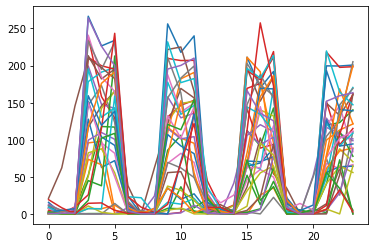

In [37]:
# Plot few lpr curves to check transition points
# 0 concentration

time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

#df_part_0_conc = df_lpr_min_part.loc[df_lpr_min_part['conc'] == 0]
df_0_conc = df_lpr_min.loc[df_lpr_min['conc'] == 0]

print ("df_0_conc.shape:" + str(df_0_conc.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

#ax.plot(np.transpose(df_0_conc.iloc[10:223,time_index_start:time_index_start + num_time_points].values));
ax.plot(np.transpose(df_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));
display(len(df_0_conc))
display(df_0_conc.head(10))

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_0_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
plt.savefig(output_filename, bbox_inches="tight")

df_lpr_min.shape:(273, 29)


273

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,275,67.0,14017,A01,17.142,0.000,0.000,2.533000,0.000000,0.000000,0.527000,0.000,0.000,10.533000,0.000000,15.517000,3.074,5.032,2.260,48.968002,220.113999,56.968002,70.216,0.000,0.000,0.000000,28.032001,215.119999,275_67.0
1,275,67.0,14017,A02,2.896,0.000,0.000,138.340002,204.239000,192.317000,4.573000,0.000,0.000,202.126000,212.387999,208.941999,20.085,0.000,0.000,208.567999,217.725999,135.864000,5.427,0.000,5.765,212.744000,164.421000,180.321998,275_67.0
2,275,67.0,14017,A03,15.633,0.000,15.503,220.816999,208.496998,214.750000,4.614000,0.000,0.000,155.118999,121.218999,57.029001,4.012,10.280,3.378,115.525999,129.056001,131.013001,1.473,0.063,0.000,54.556999,131.907001,136.492000,275_67.0
4,275,67.0,14017,A05,4.860,0.000,10.656,16.235000,11.550000,94.227000,19.537999,4.321,0.522,56.174001,35.460000,86.269000,0.000,0.000,4.996,62.596001,97.461999,107.409000,2.053,0.000,4.765,88.707999,59.480000,98.984999,275_67.0
5,275,67.0,14017,A06,1.812,1.031,0.000,60.749000,13.157000,4.110000,12.266000,1.292,5.830,30.493999,14.300000,20.655000,4.520,1.341,0.000,56.387001,27.603000,20.597000,2.582,7.225,0.386,78.428000,44.988000,46.472000,275_67.0
6,275,67.0,14017,A07,11.139,0.000,0.440,184.015002,139.030000,128.516000,1.857000,0.000,0.000,133.775999,150.930001,114.950999,1.849,0.000,0.000,114.201000,134.991999,129.346000,4.181,0.000,0.000,105.503002,113.052000,101.947000,275_67.0
7,275,67.0,14017,A08,0.000,0.000,0.000,68.828999,166.905999,173.164000,2.729000,0.000,0.000,74.596000,169.958999,178.125001,9.719,0.000,0.000,23.886001,0.000000,20.372000,0.000,0.000,0.000,3.112000,41.848000,110.324999,275_67.0
8,275,67.0,14017,A09,13.153,0.000,0.000,179.075001,174.301002,162.351000,13.485000,0.000,22.106,132.034000,127.823999,123.571001,5.074,0.000,0.000,75.054000,98.312000,104.206001,4.807,0.653,1.669,24.525000,84.433999,98.135000,275_67.0
9,275,67.0,14017,A10,15.927,0.497,0.000,15.448000,69.498000,54.312999,11.528000,0.000,0.000,69.529999,130.026999,41.845000,1.002,0.000,0.000,55.588000,107.846002,57.262000,4.283,1.123,0.697,25.287001,78.519001,68.708000,275_67.0
10,275,67.0,14017,A11,19.345,2.610,13.805,106.560000,102.168999,93.863999,0.733000,0.000,0.000,19.516000,63.652000,61.929000,2.083,0.000,0.000,48.952000,34.628000,34.601000,1.419,0.000,0.000,26.950000,26.294000,18.586000,275_67.0


/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd_feasibility_BMD/2_bmd/latest/phase_III/LPR
Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_devel_all_conc.png


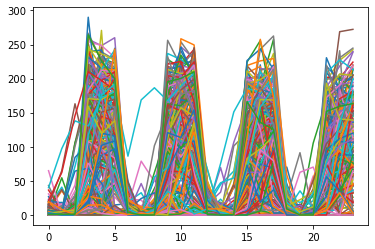

In [38]:
# Plot few lpr curves to check transition points
# all concentrations

time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

print ("df_lpr_min.shape:" + str(df_lpr_min.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (df_lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

#ax.plot(np.transpose(df_lpr_min.iloc[10:223,time_index_start:time_index_start + num_time_points].values));
ax.plot(np.transpose(df_lpr_min.iloc[:,time_index_start:time_index_start + num_time_points].values));
#ax.plot(np.transpose(df_lpr_min.iloc[:,time_index_start:time_index_start+5].values));
display(len(df_lpr_min))
display(df_lpr_min.head(10))

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_all_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
plt.savefig(output_filename, bbox_inches="tight")

In [34]:
#'''## identify biggest change of peaks in each ccp
#0-5,
#6-11,
#12-17,
#18-23
trans_points = [2,8,14,20] # "official"

df_lpr_min_ccp = df_lpr_min.copy()
df_lpr_min_ccp.insert(0, 'chemical_conc_plate', df_lpr_min.loc[:,['chemical.id','conc','plate.id']].apply(lambda x: '_'.join(x.map(str)), axis = 1))

arr_max_index_per_trans_2 = []
arr_max_index_per_trans_8 = []
arr_max_index_per_trans_14 = []
arr_max_index_per_trans_20 = []

for ccp in np.unique(df_lpr_min_ccp.chemical_conc_plate):
    #print (str(ccp))
    per_ccp = df_lpr_min_ccp.loc[df_lpr_min_ccp.chemical_conc_plate == ccp,:]
    #display(per_ccp.head())
    #display(len(per_ccp))
    #display(per_ccp.tail())
    
    former_timepoints_mean = 999
    for trans_index, trans_point in enumerate(trans_points):
        arr_diff = []
        #print ("trans_point:" + str(trans_point))
        for i in range (-2, 4):
            current_timepoint = 't' + str(trans_point+i)
            values = per_ccp[current_timepoint]
            diff = values.mean() - former_timepoints_mean
            arr_diff.append(diff)
            former_timepoints_mean = values.mean()
        max_value = max(arr_diff)
        max_index = arr_diff.index(max_value)
        #print (max_index)

        if (trans_point == 2):
            arr_max_index_per_trans_2.append(max_index)
        elif (trans_point == 8):
             arr_max_index_per_trans_8.append(max_index)
        elif (trans_point == 14):
            arr_max_index_per_trans_14.append(max_index)
        else: # (trans_point == 20):
            arr_max_index_per_trans_20.append(max_index)
        
f_out.close()
print ("analysis done")#'''

NameError: name 'f_out' is not defined

In [30]:
## calculate MOV, AUC for all chemical concentrations

delta = df_lpr_min[['chemical.id', 'conc', 'plate.id', 'well']].copy()
#delta -> delta_mov_auc

trans_points = [2,8,14,20] # "official"

end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
#    print ("\ntrans_index:" + str(trans_index))
    print ("trans_point:" + str(trans_point))
    
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta['MOV' + str(trans_index + 1)] = df_lpr_min['t' + str(trans_point + 1)] - df_lpr_min['t' + str(trans_point)]
        else:
            delta['AUC' + str(trans_index + 1)] \
            = sum(df_lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(df_lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))

display(delta.head(1))
delta.to_csv("delta_mov_auc.csv", index=False)

trans_point:2
trans_point:8
trans_point:14
trans_point:20


,chemical.id,conc,plate.id,well,MOV1,AUC1,MOV2,AUC2,MOV3,AUC3,MOV4,AUC4
0,275,67.0,14017,A01,2.533,-14.609,10.533,25.523,46.708002,315.684003,0.0,172.936


In [ ]:
chemical_id_from_here = [1030]
    
df_lpr_min_part = pd.DataFrame()

for chemical_id in chemical_id_from_here:
    print ("\n\nchemical_id:", chemical_id)
    df_per_chemical = df_lpr_min.loc[df_lpr_min['chemical.id'] == chemical_id]
    display(df_per_chemical.tail())

    df_lpr_min_part = pd.concat([df_lpr_min_part, df_per_chemical], axis = 1)
    display (df_lpr_min_part.tail())

In [32]:
# draw
unique_counts = np.unique(arr_max_index_per_trans_2)
x_2 = []
y_2 = []
for i in range(len(unique_counts)):
    x_2.append(unique_counts[i])
    count = arr_max_index_per_trans_2.count(unique_counts[i])
    y_2.append(count)

unique_counts = np.unique(arr_max_index_per_trans_8)
x_8 = []
y_8 = []
for i in range(len(unique_counts)):
    x_8.append(unique_counts[i])
    count = arr_max_index_per_trans_8.count(unique_counts[i])
    y_8.append(count)

unique_counts = np.unique(arr_max_index_per_trans_14)
x_14 = []
y_14 = []
for i in range(len(unique_counts)):
    x_14.append(unique_counts[i])
    count = arr_max_index_per_trans_14.count(unique_counts[i])
    y_14.append(count)

unique_counts = np.unique(arr_max_index_per_trans_20)
x_20 = []
y_20 = []
for i in range(len(unique_counts)):
    x_20.append(unique_counts[i])
    count = arr_max_index_per_trans_20.count(unique_counts[i])
    y_20.append(count)
    
alpha=0.5
plt.bar(x_2, y_2, color ='maroon', width = 0.3, alpha=alpha)
plt.bar(np.array(x_8)+0.15, y_8, color ='red', width = 0.3,alpha=alpha)
plt.bar(np.array(x_14)+0.3, y_14, color ='green', width = 0.3,alpha=alpha)
plt.bar(np.array(x_14)+0.45, y_20, color ='blue', width = 0.3,alpha=alpha)
    
plt.xlabel("timepoint with highest increase of peak")
plt.ylabel("count")
plt.title("maroon->2, red->8, green->14, blue->20")
plt.show()


NameError: name 'arr_max_index_per_trans_2' is not defined

In [ ]:
if 'chemical_conc' in df_0_conc.columns:
    df_0_conc = df_0_conc.drop(columns='chemical_conc')
    
if 'chemical_conc_plate' in df_0_conc.columns:
    df_0_conc = df_0_conc.drop(columns='chemical_conc_plate')

In [35]:
## identify biggest change of peaks in each ccp
#0-5,
#6-11,
#12-17,
#18-23
trans_points = [2,8,14,20] # "official"

df_0_conc_ccp = df_0_conc.copy()
df_0_conc_ccp.insert(0, 'chemical_conc_plate', df_0_conc.loc[:,['chemical.id','conc','plate.id']].apply(lambda x: '_'.join(x.map(str)), axis = 1))
display(df_0_conc_ccp.head())

f_out = open("report.txt","w+")
arr_max_index_per_trans_2 = []
arr_max_index_per_trans_8 = []
arr_max_index_per_trans_14 = []
arr_max_index_per_trans_20 = []

for ccp in np.unique(df_0_conc_ccp.chemical_conc_plate):
    #print (str(ccp))
    per_ccp = df_0_conc_ccp.loc[df_0_conc_ccp.chemical_conc_plate == ccp,:]
    #display(per_ccp.head())
    #display(len(per_ccp))
    #display(per_ccp.tail())
    
    former_timepoints_mean = 999
    for trans_index, trans_point in enumerate(trans_points):
        arr_diff = []
        #print ("trans_point:" + str(trans_point))
        for i in range (-2, 4):
            current_timepoint = 't' + str(trans_point+i)
            values = per_ccp[current_timepoint]
            diff = values.mean() - former_timepoints_mean
            arr_diff.append(diff)
            former_timepoints_mean = values.mean()
        max_value = max(arr_diff)
        max_index = arr_diff.index(max_value)
        #print (max_index)
        unique_ccp = np.unique(per_ccp['chemical_conc_plate'])
        save_this = unique_ccp[0]
        save_this = save_this + " trans_point: " + str(trans_point) + " " + str(max_index) + "\n"
        f_out.write(save_this)
        if (trans_point == 2):
            arr_max_index_per_trans_2.append(max_index)
        elif (trans_point == 8):
             arr_max_index_per_trans_8.append(max_index)
        elif (trans_point == 14):
            arr_max_index_per_trans_14.append(max_index)
        else: # (trans_point == 20):
            arr_max_index_per_trans_20.append(max_index)
        
f_out.close()
print ("analysis done")


,chemical_conc_plate,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
84,275_0.0_14017,275,0.0,14017,H01,15.554,0.000,0.000,266.520998,226.502998,233.979000,23.986,0.000,0.000,256.192001,217.862999,240.056001,7.385,2.092,2.373,211.349002,169.966000,192.048001,20.048,0.000,0.000,199.618,199.422997,200.709999,275_0.0
85,275_0.0_14017,275,0.0,14017,H02,0.000,0.000,0.000,95.794998,97.909002,5.126000,0.000,0.000,0.000,116.783002,102.254999,95.250998,2.952,1.693,6.484,82.227000,177.280000,95.333000,1.018,0.000,0.000,99.515,113.173998,121.323000,275_0.0
86,275_0.0_14017,275,0.0,14017,H03,1.458,0.000,6.755,52.001000,117.869000,117.055002,4.249,0.000,0.000,0.000000,36.578999,2.500000,3.334,0.494,0.000,112.324000,91.776000,142.791000,8.892,0.000,0.000,119.439,123.240000,140.244000,275_0.0
87,275_0.0_14017,275,0.0,14017,H04,1.069,0.000,5.859,238.694998,158.097000,129.334000,3.454,0.000,1.254,130.703999,146.540000,153.133997,7.731,4.149,12.006,142.040000,88.781999,93.755000,1.884,2.740,3.161,151.495,93.098000,115.132000,275_0.0
88,275_0.0_14017,275,0.0,14017,H05,13.102,4.205,5.012,199.407003,147.754999,142.264000,13.435,1.079,7.485,157.714999,129.557001,135.842000,27.589,1.585,0.000,105.713000,120.280000,110.998000,3.894,0.613,5.344,116.562,108.574000,98.710999,275_0.0


analysis done


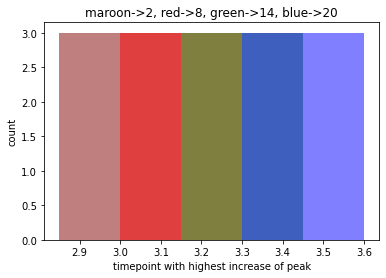

In [36]:
# draw
unique_counts = np.unique(arr_max_index_per_trans_2)
x_2 = []
y_2 = []
for i in range(len(unique_counts)):
    x_2.append(unique_counts[i])
    count = arr_max_index_per_trans_2.count(unique_counts[i])
    y_2.append(count)

unique_counts = np.unique(arr_max_index_per_trans_8)
x_8 = []
y_8 = []
for i in range(len(unique_counts)):
    x_8.append(unique_counts[i])
    count = arr_max_index_per_trans_8.count(unique_counts[i])
    y_8.append(count)

unique_counts = np.unique(arr_max_index_per_trans_14)
x_14 = []
y_14 = []
for i in range(len(unique_counts)):
    x_14.append(unique_counts[i])
    count = arr_max_index_per_trans_14.count(unique_counts[i])
    y_14.append(count)

unique_counts = np.unique(arr_max_index_per_trans_20)
x_20 = []
y_20 = []
for i in range(len(unique_counts)):
    x_20.append(unique_counts[i])
    count = arr_max_index_per_trans_20.count(unique_counts[i])
    y_20.append(count)
    
alpha=0.5
plt.bar(x_2, y_2, color ='maroon', width = 0.3, alpha=alpha)
plt.bar(np.array(x_8)+0.15, y_8, color ='red', width = 0.3,alpha=alpha)
plt.bar(np.array(x_14)+0.3, y_14, color ='green', width = 0.3,alpha=alpha)
plt.bar(np.array(x_14)+0.45, y_20, color ='blue', width = 0.3,alpha=alpha)
    
plt.xlabel("timepoint with highest increase of peak")
plt.ylabel("count")
plt.title("maroon->2, red->8, green->14, blue->20")
plt.show()


In [ ]:
plt.bar(x, y, color ='maroon', width = 0.4)
 
plt.xlabel("timepoints which highest increase of peak")
plt.ylabel("count")
plt.title("trans_20")
plt.show()

In [ ]:
# fig, is the whole thing; ax1 is a subplot in the figure, 
# so we reference it to plot bars and lines there
fig, ax1 = plt.subplots()

ind = np.arange(len(arr_max_index_per_trans_20))
#width = 0.15

# per dimension
colors = ['#00ff00', '#0000ff', '#ff00ff']
markers = ['x','o','v']
#xticklabels = ['50/50', '60/40', '70/30']

#
all_groups = [ arr_max_index_per_trans_8, arr_max_index_per_trans_14, arr_max_index_per_trans_20 ]

# plot each group of bars; loop-variable bar_values contains values for bars
for i, bar_values in enumerate( all_groups ):

  # compute position for each bar
  bar_position = width*i
  ax1.bar( ind + bar_position, bar_values, width, color=colors[i] )

# plot line for each group of bars; loop-variable y_values contains values for lines
for i, y_values in enumerate( all_groups ):

  # moves the beginning of a line to the middle of the bar
  additional_space = (width*i) + (width/2);
  # x_values contains list indices plus additional space
  x_values = [ x + additional_space for x,_ in enumerate( y_values ) ]

  # simply plot the values in y_values
  ax1.plot( x_values, y_values, marker=markers[i], color=colors[i] )

plt.setp([ax1], xticks=ind + width, xticklabels=xticklabels)

plt.tight_layout()
plt.show()

In [ ]:
plt.bar(np.arange(len(arr_max_index_per_trans_2)),arr_max_index_per_trans_2)
plt.show()

In [ ]:
np.savetxt("arr_max_index_per_trans_2.csv", arr_max_index_per_trans_2, delimiter=",")
np.savetxt("arr_max_index_per_trans_8.csv", arr_max_index_per_trans_8, delimiter=",")
np.savetxt("arr_max_index_per_trans_14.csv", arr_max_index_per_trans_14, delimiter=",")
np.savetxt("arr_max_index_per_trans_20.csv", arr_max_index_per_trans_20, delimiter=",")

In [ ]:
display(len(np.unique(df_lpr_min['chemical.id'])))
display(np.unique(df_lpr_min['chemical.id']))

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min_part.boxplot(column=['t1', 't2', 't3', 't4', 't5'])

In [ ]:
df_lpr_min_part.to_csv("df_lpr_min_part.csv", index=False)
display(df_lpr_min_part.head())
display(df_lpr_min_part.tail())

In [ ]:
## identify biggest peaks in each well
#0-5,
#6-11,
#12-17,
#18-23

trans_points = [2,8,14,20] # "official"

df_lpr_min_part_file = open ("df_lpr_min_part.csv") 
df_lpr_min_part_file_lines = df_lpr_min_part_file.readlines()
line_num = -1
arr_t_of_biggest_peak = []
for line in df_lpr_min_part_file_lines:
    #print ("\nline_num:"+str(line_num))

    splited_line = line.split(',')
    
    if (splited_line[0] == "chemical.id"):
        line_num += 1
        continue
    else:
        for trans_index, trans_point in enumerate(trans_points):
            #print ("trans_point:" + str(trans_point))
            biggest_peak = -99
            for i in range (-2, 4):
                current_timepoint = 't' + str(trans_point+i)
                #print (current_timepoint)
                values = df_lpr_min_part[current_timepoint]
                #print (values[line_num])
                if (float(values[line_num]) > biggest_peak):
                    biggest_peak = float(values[line_num])
                    t_of_biggest_peak = current_timepoint
            arr_t_of_biggest_peak.append(t_of_biggest_peak)
        line_num += 1

print (len(arr_t_of_biggest_peak))
print (arr_t_of_biggest_peak)

print (len(np.unique(arr_t_of_biggest_peak)))
print (np.unique(arr_t_of_biggest_peak))

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min_part_0_conc.boxplot(column=['t1', 't2', 't3', 't4', 't5'])
#boxplot = lpr_min_0_conc.boxplot(column=['t13', 't14', 't15', 't16', 't17'])

In [ ]:
## calculate MOV, AUC for 0 chemical concentration only

delta_0_conc = lpr_min_0_conc[['chemical.id', 'conc', 'plate.id', 'well']].copy()
#'delta' was 'delta_mov_auc'

trans_points = [2,8,14,20] # "official"
#trans_points = [2,8,15,21]
end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta_0_conc['MOV' + str(trans_index + 1)] \
            = lpr_min['t' + str(trans_point + 1)] \
            - lpr_min['t' + str(trans_point)]
        else:
            delta_0_conc['AUC' + str(trans_index + 1)] \
            = sum(lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))
        
display(delta_0_conc.head(1))
delta_0_conc.to_csv("delta_mov_auc_0_conc.csv", index=False)

In [ ]:
######## investigate whether AUC4 is negative

AUC1_mean_neg = AUC1_mean_pos = AUC2_mean_neg = AUC2_mean_pos = 0
AUC3_mean_neg = AUC3_mean_pos = AUC4_mean_neg = AUC4_mean_pos = 0

unique_chemical_id_s = np.unique(delta_0_conc['chemical.id'])
print (len(unique_chemical_id_s))
for i in range(len(unique_chemical_id_s)):
    chemical_id = unique_chemical_id_s[i]
    #if (chemical_id != 414):
    #    continue
    #print ("\n", chemical_id)
    per_chemical = delta_0_conc.loc[delta_0_conc['chemical.id'] == chemical_id]
    #display(per_chemical)
    #display(per_chemical["AUC4"].mean())

    AUC1_mean = float(per_chemical["AUC1"].mean())
    if (AUC1_mean) < 0:
        AUC1_mean_neg += 1
    else:
        AUC1_mean_pos += 1
            
    AUC2_mean = float(per_chemical["AUC2"].mean())
    if (AUC2_mean) < 0:
        AUC2_mean_neg += 1
    else:
        AUC2_mean_pos += 1
        
    AUC3_mean = float(per_chemical["AUC3"].mean())
    if (AUC3_mean) < 0:
        AUC3_mean_neg += 1
    else:
        AUC3_mean_pos += 1

    AUC4_mean = float(per_chemical["AUC4"].mean())
    if (AUC4_mean) < 0:
        AUC4_mean_neg += 1
    else:
        AUC4_mean_pos += 1

display(AUC1_mean_pos) # 100
display(AUC1_mean_neg) # 1

display(AUC2_mean_pos) # 100
display(AUC2_mean_neg) # 1

display(AUC3_mean_pos) # 100
display(AUC3_mean_neg) # 1

display(AUC4_mean_pos) # 62
display(AUC4_mean_neg) # 39
#display(AUC4_df.head())

In [ ]:
display("before dropna, len(df_lpr_filtered):"+str(len(df_lpr_filtered)))
df_lpr_filtered_no_na = df_lpr_filtered.dropna(how='any')
display("after dropna,  len(df_lpr_filtered_no_na):"+str(len(df_lpr_filtered_no_na)))

is_NaN = df_lpr_filtered.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_lpr_filtered[row_has_NaN]

display(rows_with_NaN.head())
display(len(rows_with_NaN))

In [ ]:
#df_lpr.to_csv("df_lpr_cpw_added.csv",index=False)
df_lpr_filtered.to_csv("df_lpr_filtered_cpw_added.csv",index=False)

In [ ]:
display(df_lpr_filtered_no_na.head())

print ("df_lpr_filtered_no_na.shape:" + str(df_lpr_filtered_no_na.shape))
#(8160610, 7)

#display(len(lpr_filtered_data))
#lpr_filtered_data.to_csv("lpr_filtered_data.csv",index=False)

In [ ]:
# skip this
"(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239"

# (L0,D0) 
# T1 - T60 --> 360 seconds -> 6 minutes

# (L1,D1) 
# T61 - T120 --> 360 seconds -> 6 minutes

# (L2,D2) 
# T121 - T180 --> 360 seconds -> 6 minutes

# (L3,D3) 
# T181 - T240 --> 360 seconds -> 6 minutes

In [ ]:
# calculate new decreasing endpoints
delta_mov_auc_w_decreasing = delta_mov_auc.copy()
for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    for just_index, end_point in enumerate(end_points):
        ori = str(end_point) + str(transition_index + 1)
        #print ("\nori:" + str(ori))
        #print ("delta_mov_auc_w_decreasing[ori]:\n" + str(delta_mov_auc_w_decreasing[ori]))
        
        for new_index in range(len(transition_points)-1):
            final_index = transition_index + new_index
            new = str(end_point) + str(final_index+2)
            #print ("new:" + str(new))
            check_whether_new_exists = new in delta_mov_auc_w_decreasing.columns
            #print ("check_whether_new_exists:"+str(check_whether_new_exists))
            if (check_whether_new_exists == False):
                continue
            name = str(end_point) + str(transition_index + 1) + "_" + str(new)
            print ("name:" + str(name))
            delta_mov_auc_w_decreasing[name] \
                = delta_mov_auc_w_decreasing[ori] - delta_mov_auc_w_decreasing[new]
display (delta_mov_auc_w_decreasing.head(1))

In [ ]:
# calculate final decreasing endpoints
delta_mov_auc_w_decreasing_copied = delta_mov_auc_w_decreasing.copy()
delta_mov_auc_final = delta_mov_auc_w_decreasing.copy()
columns_to_keep = []
for just_index, end_point in enumerate(end_points):
    for (columnName, columnData) in delta_mov_auc_w_decreasing_copied.iteritems():
        if "_" not in columnName:
            continue
        if str(end_point) not in columnName:
            continue
#        print('Colunm Name : ', columnName)
        columns_to_keep.append(columnName)

    delta_mov_auc_w_decreasing_copied_select = delta_mov_auc_w_decreasing_copied.loc[:,columns_to_keep]
    
    # "axis 0” represents rows
    # "axis 1” represents columns

    all_ = delta_mov_auc_w_decreasing_copied_select.sum(axis=1)
   # print ("all_:\n" + str(all_))
    
    final_endpoint_name = str(end_point) + "_all_" 
    delta_mov_auc_final.insert(0, final_endpoint_name, all_)
    

display("delta_mov_auc_final.head():", delta_mov_auc_final.head())
    
delta_mov_auc_final.to_csv("delta_mov_auc_final.csv",index=False)
    

In [ ]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())
#display(delta_mov_auc.tail())

In [ ]:
import generate_dose_response as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [ ]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
    end_points_from_here = ['MOV1','AUC1']
else:
    chemical_id_from_here = [53]
    end_points_from_here = ['MOV1']

#report = True
report = False

for chemical_id in chemical_id_from_here:
    if (report): print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()